In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import warnings
warnings.simplefilter(action="ignore")
import datetime as dt
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
data = pd.read_excel("UK.xlsx")

In [3]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Day of Week
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085,United Kingdom,83.40000,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085,United Kingdom,81.00000,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085,United Kingdom,81.00000,Tuesday
3,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085,United Kingdom,30.00000,Tuesday
4,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65000,13085,United Kingdom,39.60000,Tuesday


In [4]:
data.shape

(625486, 10)

In [5]:
data.groupby("Invoice").agg({"Description" : "count"}).sort_values("Description", ascending=False).head()

,Description
Invoice,
576339,460
579196,450
580727,442
573576,384
567656,370


In [6]:
data.groupby("Invoice").agg({"Description" : "count"}).describe().T

,count,mean,std,min,25%,50%,75%,max
Description,30405.00000,20.57181,23.07728,1.00000,6.00000,14.00000,26.00000,460.00000


array([[<AxesSubplot:title={'center':'Description'}>]], dtype=object)

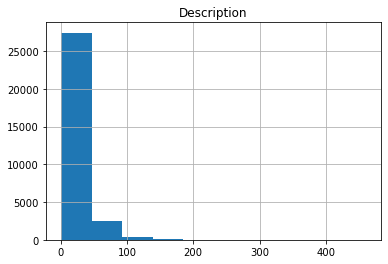

In [7]:
data.groupby("Invoice").agg({"Description" : "count"}).hist()

In [8]:
products = {}
for i in data["Invoice"]:
    products[i] = list(data[data["Invoice"] == i ]["Description"])

In [9]:
normal_baskets = {}
large_baskets = {}
for i,j in products.items():
    if len(j) < 60:
        normal_baskets[i] = j
    else:
        large_baskets[i] = j

In [10]:
max_len = 0 
for i in normal_baskets.values():
    if len(i) > max_len:
        max_len = len(i)

In [11]:
max_len1 = 0 
for i in large_baskets.values():
    if len(i) > max_len1:
        max_len1 = len(i)

In [12]:
max_len 

59

In [13]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
oht_ary = te.fit(normal_baskets.values()).transform(normal_baskets.values(), sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df.head()

,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,DOLLY GIRL BEAKER,FLAMINGO LIGHTS,HOME SWEET HOME BLACKBOARD,I LOVE LONDON MINI BACKPACK,IVORY PAPER CUP CAKE CASES,OVAL WALL MIRROR DIAMANTE,PAINT YOUR OWN CANVAS SET,PEACE WOODEN BLOCK LETTERS,RED SPOT GIFT BAG LARGE,RED/WHITE DOT MINI CASES,RIDGED GLASS T-LIGHT HOLDER,SET 2 TEA TOWELS I LOVE LONDON,SET Of 6 SOLDIER SKITTLES,SILVER CHERRY LIGHTS,SILVER T-LIGHT SETTING,STAR T-LIGHT HOLDER,TRELLIS COAT RACK,VINTAGE DESIGN GIFT TAGS,WHITE BAMBOO RIBS LAMPSHADE,WHITE CHERRY LIGHTS,10 COLOUR SPACEBOY PEN,11 PC CERAMIC TEA SET POLKADOT,12 ASS ZINC CHRISTMAS DECORATIONS,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 MINI TOADSTOOL PEGS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED SPOTTY,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,18PC WOODEN CUTLERY SET DISPOSABLE,2 DAISIES HAIR COMB,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,24 HANGING EASTER EGGS FLORAL TUB,3 BIRDS CANVAS SCREEN,3 BLACK CATS W HEARTS BLANK CARD,3 GARDENIA MORRIS BOXED CANDLES,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE JIGSAW TOADSTOOLS,3 PIECE SPACEBOY COOKIE CUTTER SET,3 PINK HEN+CHICKS IN BASKET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 RAFFIA RIBBONS VINTAGE CHRISTMAS,3 ROSE MORRIS BOXED CANDLES,3 STRIPEY MICE FELTCRAFT,3 TRADITIONAL COOKIE CUTTERS SET,3 TRADITIONAl BISCUIT CUTTERS SET,3 WHITE CHOC MORRIS BOXED CANDLES,3 WICK CHRISTMAS BRIAR CANDLE,36 DOILIES DOLLY GIRL,36 DOILIES SPACEBOY DESIGN,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE POSY,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE RED SPOTTY,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D CHRISTMAS STAMPS STICKERS,3D DOG PICTURE PLAYING CARDS,3D HEARTS HONEYCOMB PAPER GARLAND,3D SHEET OF CAT STICKERS,3D SHEET OF DOG STICKERS,3D SHEET OF SEA WORLD STICKERS,3D STICKERS CHRISTMAS STAMPS,3D STICKERS TRADITIONAL CHRISTMAS,3D STICKERS VINTAGE CHRISTMAS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 BLUE DINNER CANDLES SILVER FLOCK,4 BURGUNDY WINE DINNER CANDLES,4 FESTIVE GREEN DINNER CANDLES,4 GOLD FLOCK CHRISTMAS BALLS,4 IVORY DINNER CANDLES GOLD FLOCK,4 IVORY DINNER CANDLES SILVER FLOCK,4 LAVENDER BOTANICAL DINNER CANDLES,4 LILY BOTANICAL DINNER CANDLES,4 PEAR BOTANICAL DINNER CANDLES,4 PINK DINNER CANDLE SILVER FLOCK,4 PINK FLOCK CHRISTMAS BALLS,4 ROSE PINK DINNER CANDLES,4 SKY BLUE DINNER CANDLES,4 TRADITIONAL SPINNING TOPS,4 VANILLA BOTANICAL CANDLES,4 WILDFLOWER BOTANICAL CANDLES,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,5 STRAND GLASS NECKLACE AMBER,5 STRAND GLASS NECKLACE AMETHYST,5 STRAND GLASS NECKLACE BLACK,5 STRAND GLASS NECKLACE CRYSTAL,50'S CHRISTMAS PAPER GIFT BAG,50CM METAL STRING WITH 7 CLIPS,6 CHOCOLATE LOVE HEART T-LIGHTS,6 CROCHET STRAWBERRIES,6 EGG HOUSE PAINTED WOOD,6 GIFT TAGS 50'S CHRISTMAS,6 GIFT TAGS VINTAGE CHRISTMAS,6 HOOK JEWELLERY STAND BLACK DRESS,6 RABBIT CHAIN EASTER,6 RIBBONS ELEGANT CHRISTMAS,6 RIBBONS EMPIRE,6 RIBBONS RUSTIC CHARM,6 RIBBONS SHIMMERING PINKS,6 ROCKET BALLOONS,60 CAKE CASES DOLLY GIRL DESIGN,60 CAKE CASES VINTAGE CHRISTMAS,60 GOLD AND SILVER FAIRY CAKE CASES,60 TEATIME FA

In [14]:
sparse_df.shape

(28699, 4766)

In [15]:
freq_items = apriori(sparse_df, min_support=0.01, use_colnames=True, verbose=1)
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items.sort_values("support", ascending=False)

Processing 7812 combinations | Sampling itemset size 3 2


,support,itemsets,length
377,0.11175,(WHITE HANGING HEART T-LIGHT HOLDER),1
20,0.06251,(ASSORTED COLOUR BIRD ORNAMENT),1
152,0.05774,(JUMBO BAG RED RETROSPOT),1
231,0.05485,(PARTY BUNTING),1
128,0.05342,(HOME BUILDING BLOCK WORD),1
292,0.05167,(REX CASH+CARRY JUMBO SHOPPER),1
177,0.05049,(LUNCH BAG BLACK SKULL.),1
386,0.04993,(WOODEN FRAME ANTIQUE WHITE ),1
126,0.04746,(HEART OF WICKER LARGE),1
127,0.04645,(HEART OF WICKER SMALL),1


In [16]:
freq_items.shape

(488, 3)

In [17]:
final_df = association_rules(freq_items, metric = "confidence", min_threshold = 0.3)
final_df.sort_values(by="lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.01526,0.01833,0.01084,0.71005,38.74069,0.01056,3.38561
39,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.01833,0.01526,0.01084,0.59125,38.74069,0.01056,2.40917
36,(FELTCRAFT CUSHION BUTTERFLY),(FELTCRAFT CUSHION RABBIT),0.01774,0.01760,0.01146,0.64637,36.73275,0.01115,2.77802
35,(FELTCRAFT CUSHION RABBIT),(FELTCRAFT CUSHION BUTTERFLY),0.01760,0.01774,0.01146,0.65149,36.73275,0.01115,2.81843
130,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.01962,0.01913,0.01373,0.69982,36.58325,0.01335,3.26763
125,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.01913,0.01962,0.01373,0.71767,36.58325,0.01335,3.47245
128,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.02464,0.01526,0.01373,0.55728,36.51485,0.01335,2.22431
127,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.01526,0.02464,0.01373,0.89954,36.51485,0.01335,9.70932
45,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.02464,0.01962,0.01631,0.66195,33.74309,0.01582,2.90013
46,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.01962,0.02464,0.01631,0.83126,33.74309,0.01582,5.78032


In [18]:
final_df.shape

(131, 9)